In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cubedsphere as cs

# Surface pressure

48 20;48 160;96 20;96 160;

/u/jzhuang1/miniconda3/envs/geopy/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


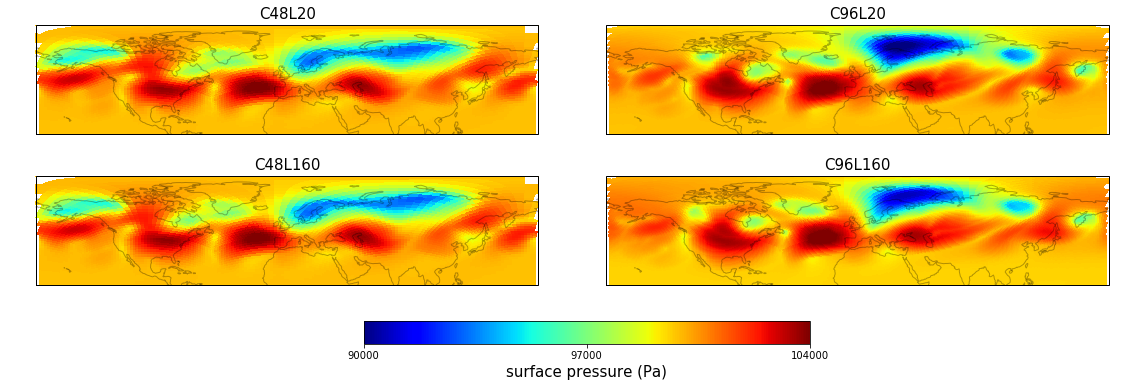

In [36]:
vmin,vmax = [900e2,1040e2]

#Vres_list = [20,40,80,160]
#Hres_list = [48,96,192,384]

Vres_list = [20, 160]
Hres_list = [48, 96]

fig, axes = plt.subplots(len(Vres_list),len(Hres_list),figsize=[16,12],
                         subplot_kw=dict(projection=ccrs.PlateCarree()))

for i,Hres in enumerate(Hres_list):
    for j,Vres in enumerate(Vres_list):
        print(Hres,Vres,end=';')
        
        try:
            datadir = "../../output/C{0}/C{0}L{1}/".format(Hres,Vres)
            ds = cs.open_FV3data(datadir,"atmos_daily").isel(time=-1)
        except:
            print('fail to open')
            
        dr = ds['ps']; #print('max:',dr.max().values)
        
        ax = axes[j][i]
        ax.coastlines(alpha=0.3)

        im = cs.plotCS( dr, ds, ax,
                       vmin=vmin, vmax=vmax, cmap='jet')

        ax.set_ylim([10,88]);#ax.set_xlim([-100,120])
        ax.set_title('C{0}L{1}'.format(Hres,Vres),fontsize=15)     

# provide a list of axes to let the colorbar span all those axes
fig.colorbar(im, ax=axes.ravel().tolist(), pad=-0.5, orientation='horizontal',
             shrink=0.5,ticks=np.linspace(vmin,vmax,3)).\
             set_label("surface pressure (Pa)",fontsize=15)

fig.tight_layout()

fig.savefig('PS_2x2plot.png',dpi=400)

# Wind and vorticity

In [2]:
Hres = 48
Vres = 20
datadir = "../../output/C{0}/C{0}L{1}/".format(Hres,Vres)
datadir

'../../output/C48/C48L20/'

In [3]:
ds = cs.open_FV3data(datadir,"winds_daily").isel(time=-1)
ds

<xarray.Dataset>
Dimensions:  (pfull: 20, phalf: 21, tile: 6, x: 48, x_b: 49, y: 48, y_b: 49)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * pfull    (pfull) float64 7.673 47.07 100.7 152.7 204.4 255.8 307.2 358.6 ...
  * phalf    (phalf) float64 1.0 26.0 77.26 128.5 179.8 231.1 282.3 333.6 ...
    time     float64 16.0
    lon      (tile, y, x) float32 305.783 307.37 308.986 310.631 312.306 ...
    lat      (tile, y, x) float32 -34.8911 -35.5988 -36.2858 -36.951 ...
  * x_b      (x_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * y_b      (y_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
    lon_b    (tile, y_b, x_b) float32 305.0 306.573 308.174 309.805 311.465 ...
    lat_b    (tile, y_b, x_b) float32 -35.2644 -35.9889 -36.6926 -37.3743 ...
    area     (tile, y, x) float32 2.35456e+10 2.39763e+10 2.43917e+10 ...
Dimensions w

In [4]:
ds['vort850'].max().compute()

<xarray.DataArray 'vort850' ()>
array(0.00016229302855208516)
Coordinates:
    time     float64 16.0

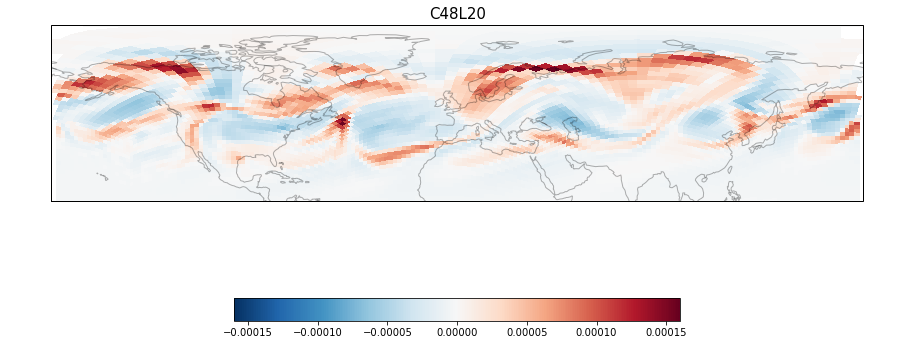

In [5]:
fig, ax = plt.subplots(1,1,figsize=[16,12],
                         subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines(alpha=0.3)

im = cs.plotCS( ds['vort850'], ds, ax, cmap='RdBu_r', vmax = 1.6e-4, vmin=-1.6e-4)

ax.set_ylim([10,88]);#ax.set_xlim([-100,120])
ax.set_title('C{0}L{1}'.format(Hres,Vres),fontsize=15)

fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5)

In [6]:
ds['omg850']

<xarray.DataArray 'omg850' (tile: 6, y: 48, x: 48)>
dask.array<getitem, shape=(6, 48, 48), dtype=float64, chunksize=(1, 48, 48)>
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
    time     float64 16.0
    lon      (tile, y, x) float32 305.783 307.37 308.986 310.631 312.306 ...
    lat      (tile, y, x) float32 -34.8911 -35.5988 -36.2858 -36.951 ...
    area     (tile, y, x) float32 2.35456e+10 2.39763e+10 2.43917e+10 ...
Dimensions without coordinates: tile
Attributes:
    long_name:     850-mb omega
    units:         Pa/s
    cell_methods:  time: point

In [7]:
ds['omg850'].max().values

array(0.23329082131385803)

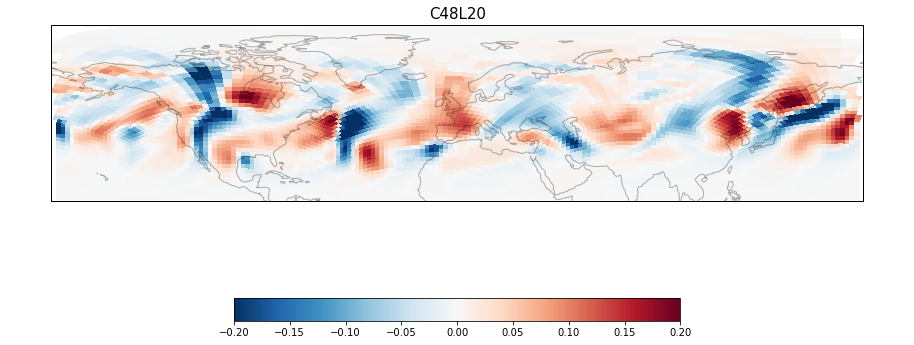

In [9]:
fig, ax = plt.subplots(1,1,figsize=[16,12],
                         subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.coastlines(alpha=0.3)

im = cs.plotCS( ds['omg850'], ds, ax, cmap='RdBu_r', vmax = 0.2, vmin=-0.2)

ax.set_ylim([10,88]);#ax.set_xlim([-100,120])
ax.set_title('C{0}L{1}'.format(Hres,Vres),fontsize=15)

fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.5)

In [10]:
# mean velocity
np.average(ds['omg850'],weights=ds['area'])

5.3597667491675079e-06

# Divergence vs Vorticity

In [11]:
ds = cs.open_FV3data(datadir,"atmos_daily").isel(time=-1)
ds

<xarray.Dataset>
Dimensions:  (pfull: 20, phalf: 21, tile: 6, x: 48, x_b: 49, y: 48, y_b: 49)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
    time     float64 16.0
  * pfull    (pfull) float64 7.673 47.07 100.7 152.7 204.4 255.8 307.2 358.6 ...
  * phalf    (phalf) float64 1.0 26.0 77.26 128.5 179.8 231.1 282.3 333.6 ...
    lon      (tile, y, x) float32 305.783 307.37 308.986 310.631 312.306 ...
    lat      (tile, y, x) float32 -34.8911 -35.5988 -36.2858 -36.951 ...
  * x_b      (x_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * y_b      (y_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
    lon_b    (tile, y_b, x_b) float32 305.0 306.573 308.174 309.805 311.465 ...
    lat_b    (tile, y_b, x_b) float32 -35.2644 -35.9889 -36.6926 -37.3743 ...
    area     (tile, y, x) float32 2.35456e+10 2.39763e+10 2.43917e+10 ...
Dimensions w

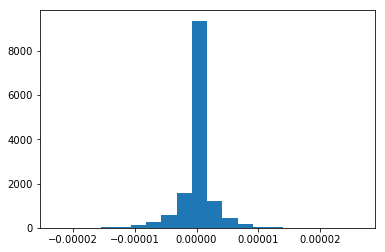

In [15]:
plt.hist(ds['divg'].isel(pfull=-4).values.ravel(),bins=20);

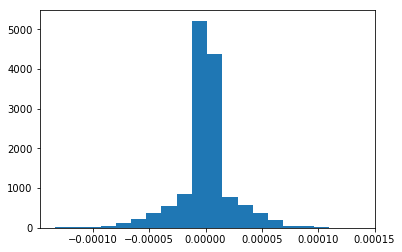

In [16]:
plt.hist(ds['vort'].isel(pfull=-4).values.ravel(),bins=20);

# Compare with GEOSFP winds

In [60]:
ds = xr.open_dataset('~/nobackup/gcdata/ExtData/GEOS_4x5/GEOS_FP/2015/07/GEOSFP.20150701.A3dyn.4x5.nc')

In [66]:
dr = ds['OMEGA'].isel(time=0,lev=9)

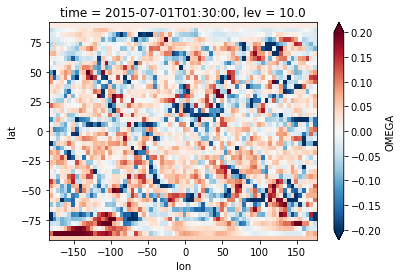

In [73]:
dr.plot(vmin=-0.2, vmax=0.2, cmap='RdBu_r')